In [236]:
import seaborn as sns
import matplotlib.pyplot as pl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [7]:
data=pd.read_csv('fish.csv')

In [8]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [9]:
data.shape

(159, 7)

In [10]:
categorical=[i for i in data.columns if data[i].dtypes=='O' ]

In [11]:
categorical

['Species']

In [16]:
numerical=[i for i in data.columns if data[i].dtypes!='O']

In [17]:
numerical

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

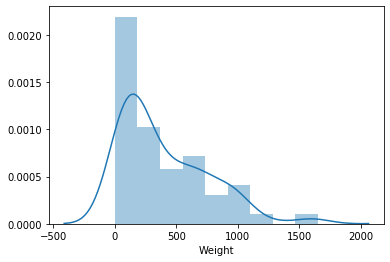

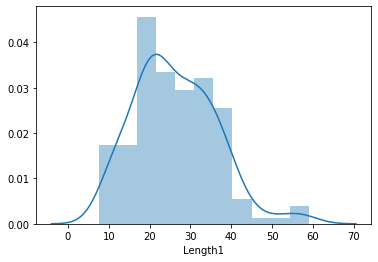

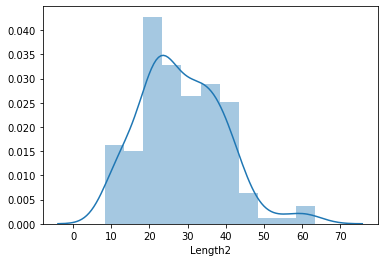

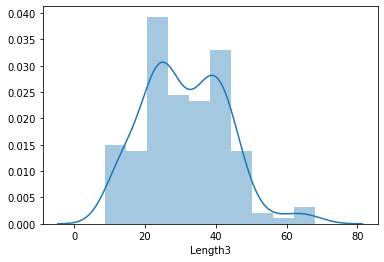

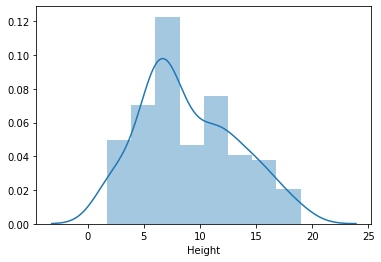

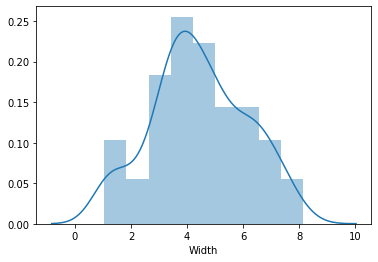

In [21]:
for i in numerical:
    sns.distplot(data[i])
    pl.show()

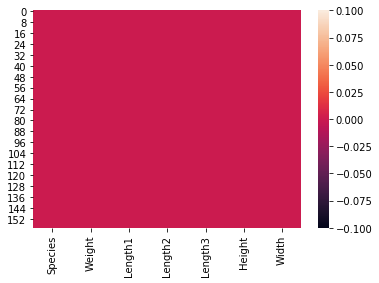

In [22]:
sns.heatmap(data.isna())

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [28]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


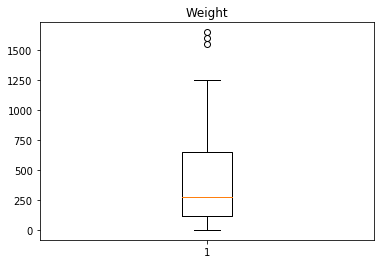

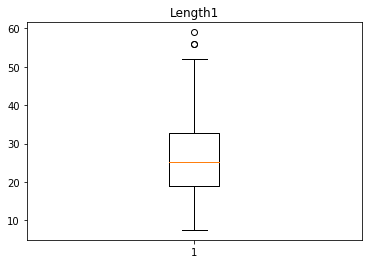

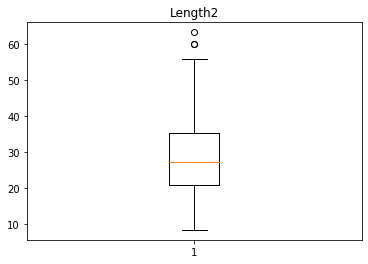

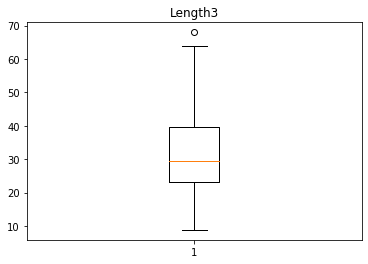

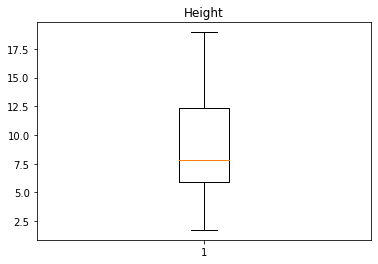

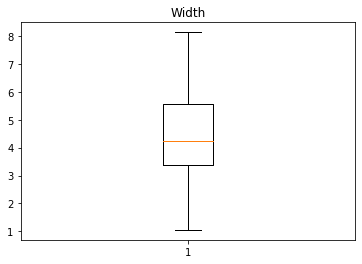

In [52]:
for i in numerical:
    pl.boxplot(data[i])
    pl.title(i)
    pl.show()

In [42]:
np.unique(data.Species)

<IPython.core.display.Javascript object>

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

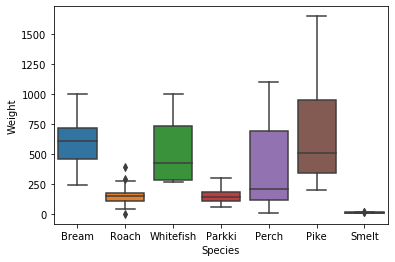

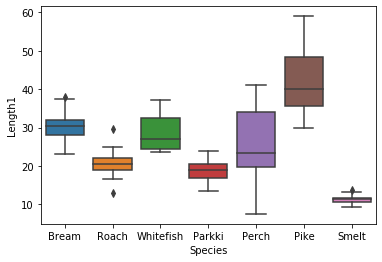

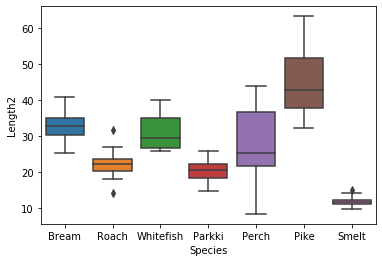

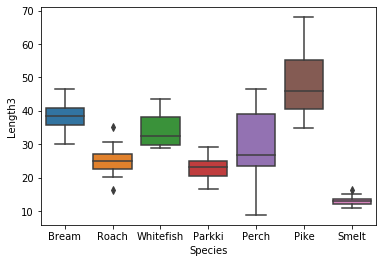

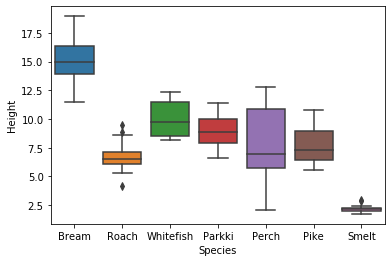

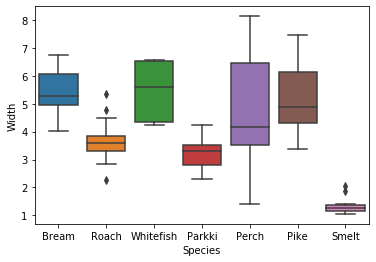

In [54]:
for i in numerical:
    sns.boxplot(data=data,x='Species',y=i)
    pl.show()

In [79]:
def detect_outliers(data):
    means=np.mean(data,axis=0)
    deviation=np.std(data,axis=0)
    items=dict()
    for i,j in zip(numerical,range(len(means))):
        z_score=(data[i]-means[j])/deviation[j]
        items[i]=list()
        items[i].append(z_score[np.abs(z_score)>3].index)
        
    return items


outliers=detect_outliers(data[numerical])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
np.mean(data[numerical],axis=0)

<IPython.core.display.Javascript object>

Weight     398.326415
Length1     26.247170
Length2     28.415723
Length3     31.227044
Height       8.970994
Width        4.417486
dtype: float64

In [72]:
data.loc[144]

Species      Pike
Weight       1650
Length1        59
Length2      63.4
Length3        68
Height     10.812
Width        7.48
Name: 144, dtype: object

In [175]:
data1=data.copy()

In [176]:
outliers

{'Weight': [Int64Index([142, 143, 144], dtype='int64')],
 'Length1': [Int64Index([144], dtype='int64')],
 'Length2': [Int64Index([144], dtype='int64')],
 'Length3': [Int64Index([144], dtype='int64')],
 'Height': [Int64Index([], dtype='int64')],
 'Width': [Int64Index([], dtype='int64')]}

In [177]:
data1.loc[144]

Species      Pike
Weight       1650
Length1        59
Length2      63.4
Length3        68
Height     10.812
Width        7.48
Name: 144, dtype: object

In [178]:
for i,j in outliers.items():
    index=np.array(j)
    data1.drop(data1.iloc[index[0],:].index,axis=0,inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
data1.shape

(153, 7)

In [188]:
data1.tail(20)

,Species,Weight,Length1,Length2,Length3,Height,Width
133,Pike,345.0,36.0,38.5,41.0,6.3960,3.9770
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
135,Pike,510.0,40.0,42.5,45.5,6.8250,4.4590
136,Pike,540.0,40.1,43.0,45.8,7.7860,5.1296
137,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
138,Pike,567.0,43.2,46.0,48.7,7.7920,4.8700
139,Pike,770.0,44.8,48.0,51.2,7.6800,5.3760
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


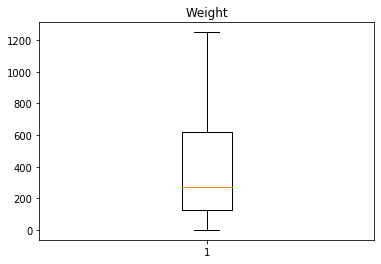

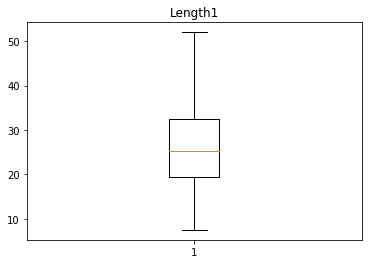

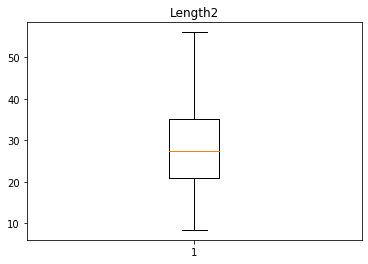

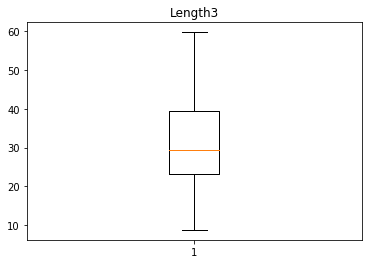

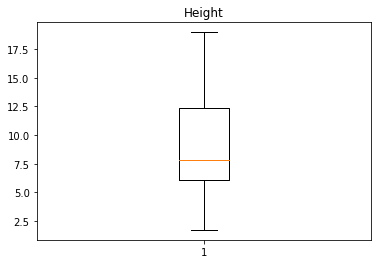

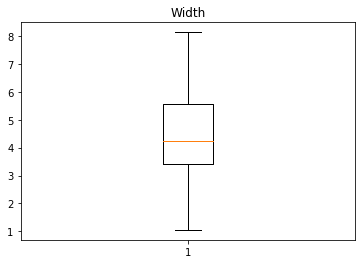

In [189]:
for i in numerical:
    pl.boxplot(data1[i])
    pl.title(i)
    pl.show()

In [220]:
data2=data1.copy()
encoder=LabelEncoder()
encoder.fit(data2['Species'])

LabelEncoder()

In [221]:
data2['Species']=encoder.transform(data2['Species'])

In [222]:
data2

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [226]:
X=data2.iloc[:,1:]
y=data2.iloc[:,0]

In [238]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [239]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [269]:
logistic=LogisticRegression(C=15,max_iter=10000)
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train),logistic.score(X_test,y_test)

(0.9262295081967213, 0.9032258064516129)